# Analysis of Community Projects dataset

## Setup

### Imports as necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn

### Read in required dataset

In [2]:
community_df = pd.read_csv("../Data/Community_Development_Block_Grant_Activity.csv")

In [5]:
list(community_df.columns[7:10])

['IDIS_ACTV_ID', 'ADDRESS', 'CITY']

In [3]:
community_df.sort_values(by='COMPLETED_DT').dropna(subset=['COMPLETED_DT'])

,X,Y,OBJECTID,ID,GRANTEE,GRANTEE_TYPE,GRANTEE_ID,IDIS_ACTV_ID,ADDRESS,CITY,STATE,ZIP,LAT,LON,GROUPING,NAME,ALIAS,ACTV_FUNDING_AMT,COMPLETED_DT,ID_CHAR
155163,-75.936404,40.341542,155164,907800151,READING,51.0,9078.0,151,"130 W Buttonwood St, ...",Reading,PA,19601,40.341542,-75.936404,Public Services,"Other Public Services Not Listed in 05A-05Y, 03T",NaN,0.00,01/01/0001,907800151
308438,-73.845508,40.909620,308439,4607001259,MOUNT VERNON,52.0,46070.0,1259,"195 W 1st St, ...",Mount Vernon,NY,10550,40.909620,-73.845508,Public Services,Crime Awareness/Prevention,NaN,0.00,01/01/1988,4607001259
113231,-73.836835,40.905073,113232,4607001120,MOUNT VERNON,52.0,46070.0,1120,"250 S 6th Ave, ...",Mount Vernon,NY,10550,40.905073,-73.836835,Public Services,Child Care Services,NaN,0.00,01/01/1989,4607001120
113421,-73.836835,40.905073,113422,4607001211,MOUNT VERNON,52.0,46070.0,1211,"250 S 6th Ave, ...",Mount Vernon,NY,10550,40.905073,-73.836835,Public Services,Child Care Services,NaN,0.00,01/01/1989,4607001211
113419,-73.841043,40.903339,113420,4607001221,MOUNT VERNON,52.0,46070.0,1221,"1 Eastchester Ln, ...",Mount Vernon,NY,10550,40.903339,-73.841043,Housing,Rehabilitation: Multi-Unit Residential,NaN,0.00,01/01/1989,4607001221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104954,-73.364721,40.738901,104955,900000000693414,Babylon Township,52.0,42024.0,1324,59 Cumberbach St,Wyandanch,NY,11798,40.738901,-73.364721,Public Services,Employment Training,NaN,5000.00,12/31/2018,900000000693414
19263,-87.682180,42.034034,19264,900000000674907,EVANSTON,51.0,17816.0,1252,903 Sherman Ave,Evanston,IL,60202,42.034034,-87.682180,Public Services,Youth Services,NaN,4000.00,12/31/2018,900000000674907
104958,-73.363851,40.748958,104959,900000000693354,Babylon Township,52.0,42024.0,1320,14 S 20th St,Wyandanch,NY,11798,40.748958,-73.363851,Public Services,Employment Training,NaN,7497.58,12/31/2018,900000000693354
221476,-121.493729,38.579750,221477,900000000686806,SACRAMENTO,51.0,31467.0,3989,1017 10th St,Sacramento,CA,95814,38.579750,-121.493729,Public Services,"Other Public Services Not Listed in 05A-05Y, 03T",NaN,83060.00,12/31/2018,900000000686806


### Description of dataset

- X : Latitude
- Y : Longitude
- OBJECTID: In ArcGIS, a system-managed value that uniquely identifies a record or feature.
- ID: In Integrated Disbursement and Information System (IDIS), a uniquely generated value that identifies the record; Numeric version of ID
- GRANTEE: CDBG Grantee Name
- GRANTEE_TYPE: Type of Grantee; state grantees (TYPE = 21), entitlement grantees (TYPE = 51, 52, 61),  Hawaiian small cities (TYPE = 77) and consortia (TYPE = 90).  Entitlement grantees can be categorized as metropolitan cities, central city (TYPE = 51), metropolitan cities, other city (TYPE = 52) and urban counties (TYPE = 61).
- GRANTEE_ID: Grantee ID associated with CDBG Grantee
- IDIS_ACTV_ID: IDIS Activity ID representing the individual activity associated with the CDBG Grantee
- ADDRESS: Street Address
- CITY: City
- STATE: State
- ZIP: ZIP Code
- LAT: Latitude (decimal)
- LON: Longitude (decimal)
- GROUPING: Type of CDBG Activity; GROUPING = 'Acquisition' , GROUPING = 'Economic Development', GROUPING = 'Housing', GROUPING = 'Public Improvements', GROUPING = 'Public Services' and GROUPING = 'Other'
- NAME: Name of Activity
- ALIAS: Alias Name
- ACTV_FUNDING_AMT: Activity Funding Amount
- COMPLETED_DT: Activity Completion Date
- ID_CHAR: In Integrated Disbursement and Information System (IDIS), a uniquely generated value that identifies the record; Character version of ID
- SHAPE: The characteristic appearance or visible form of a geographic object as represented on a map

## Section 1: Basic analysis

### First question, which states have the most (and the least) community projects?

**Top States**

In [4]:
value_counts = community_df['STATE'].value_counts()
community_df['PROJECT_COUNTS'] = community_df['STATE'].map(value_counts)
community_df['PERCENTAGE_OF_TOTAL'] = round((community_df['PROJECT_COUNTS'] / len(community_df)) * 100, 2)

**Top States** (base number)

In [5]:
community_df.groupby(['STATE'])['STATE'].count().sort_values(ascending=False).head()

STATE
CA    49935
MA    24920
NY    23350
TX    19225
NJ    18981
Name: STATE, dtype: int64

**Bottom States** (base number)

In [6]:
community_df.groupby(['STATE'])['STATE'].count().sort_values(ascending=False).tail()

STATE
NE    380
PR    353
AK    227
GU     11
VI      2
Name: STATE, dtype: int64

In [7]:
columns = ['STATE', 'PERCENTAGE_OF_TOTAL']

graphing_df = community_df[columns].drop_duplicates(keep="first").sort_values("PERCENTAGE_OF_TOTAL", ascending=False)

**Top states** (by percentage)

In [8]:
graphing_df.head()

,STATE,PERCENTAGE_OF_TOTAL
190777,CA,14.82
41570,MA,7.39
98134,NY,6.93
153943,TX,5.70
84297,NJ,5.63


**Bottom states** (by percentage)

In [9]:
graphing_df.tail()

,STATE,PERCENTAGE_OF_TOTAL
82635,NE,0.11
188719,PR,0.10
200049,AK,0.07
188995,GU,0.00
190278,VI,0.00


**Amount of projects as a percentage by state, charted**

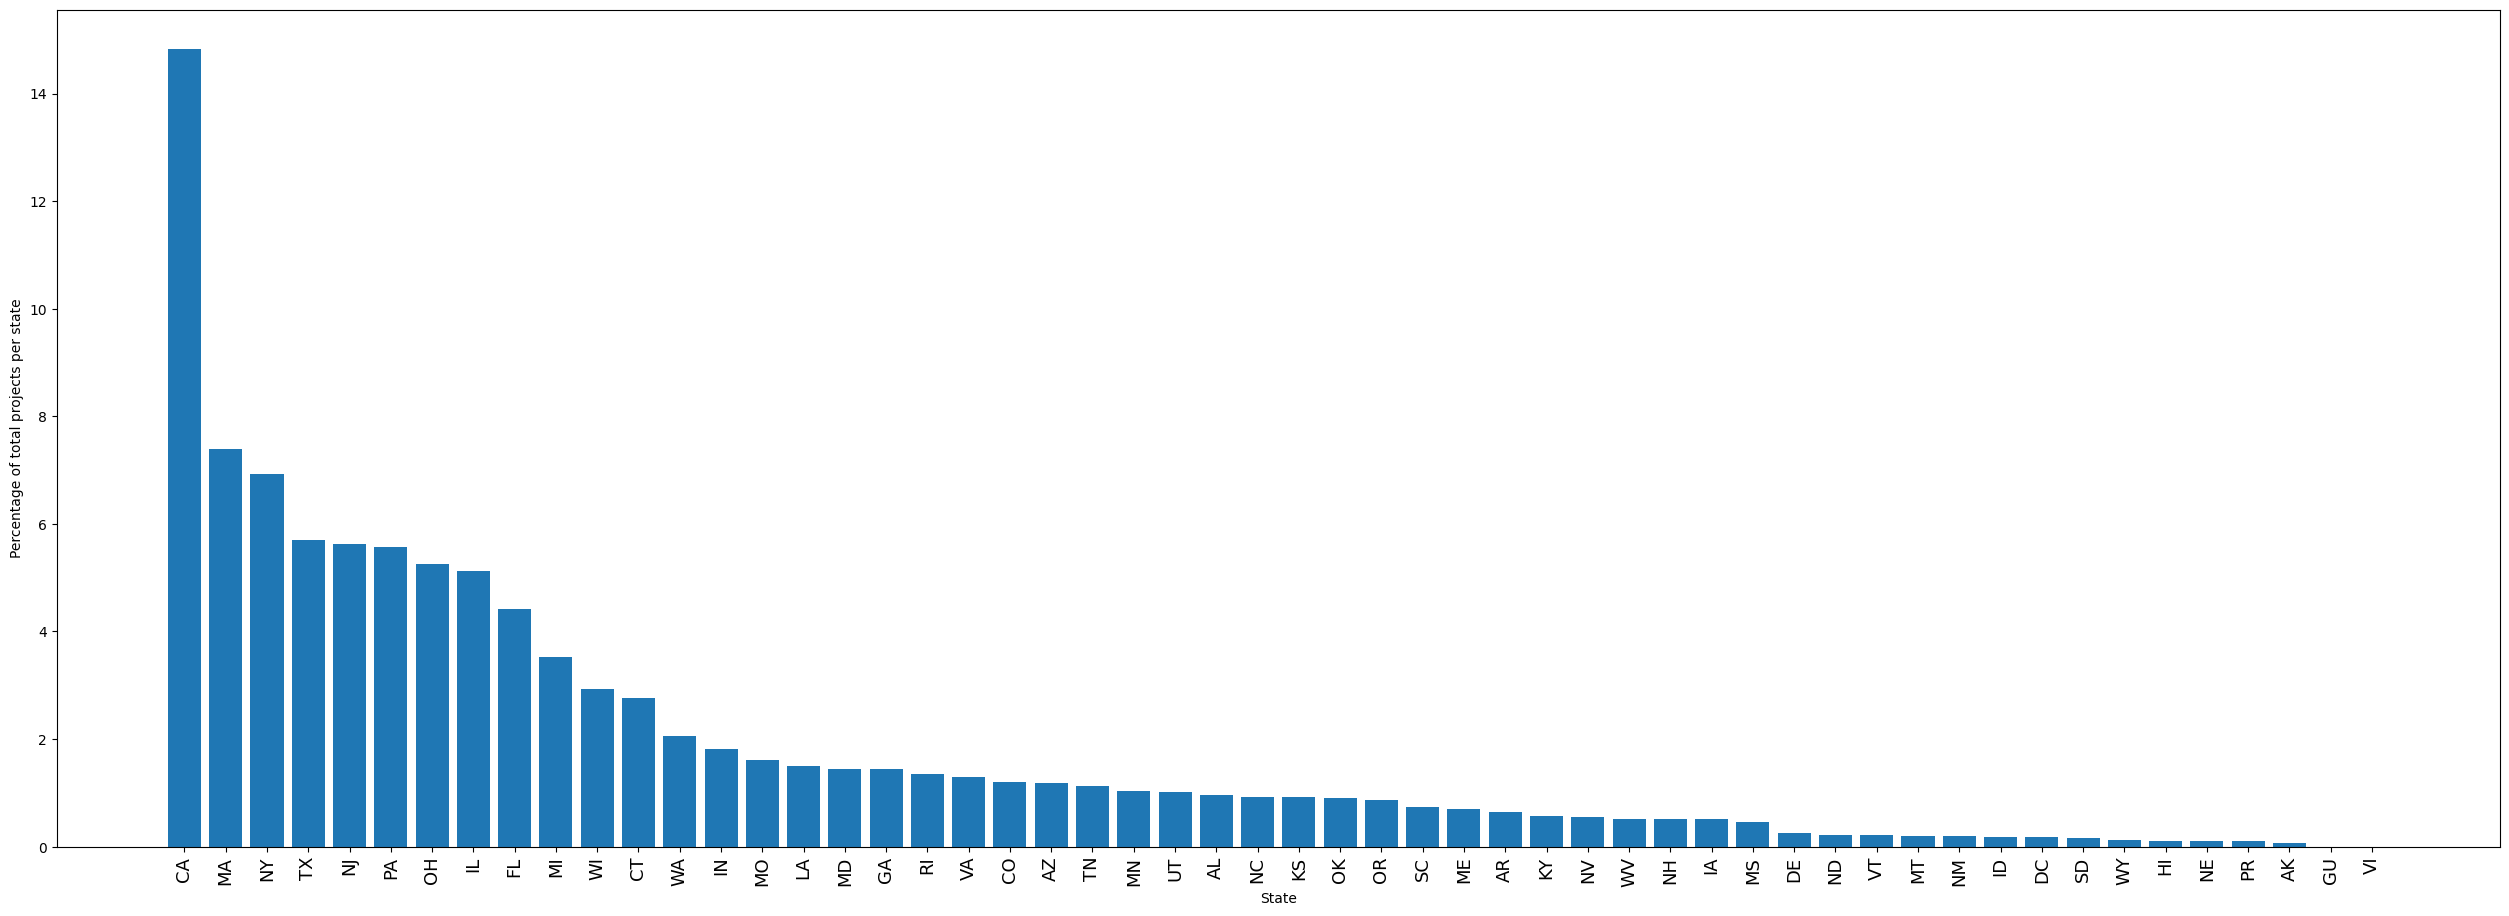

<Figure size 1500x480 with 0 Axes>

In [10]:
labels = graphing_df['STATE'].values
values = graphing_df['PERCENTAGE_OF_TOTAL'].values
plt.figure(figsize=(25,9))
plt.bar(x=labels, height=values, width=0.8)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)  # Increase the space at the bottom
plt.tight_layout()
plt.xlabel("State")
plt.ylabel("Percentage of total projects per state")
plt.tick_params(axis='x', which='major', labelsize=13)
plt.figure().set_figwidth(15)
plt.show;

### Are there any trends by type of community project?

In [11]:
community_df.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'GRANTEE', 'GRANTEE_TYPE', 'GRANTEE_ID',
       'IDIS_ACTV_ID', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'LAT', 'LON',
       'GROUPING', 'NAME', 'ALIAS', 'ACTV_FUNDING_AMT', 'COMPLETED_DT',
       'ID_CHAR', 'PROJECT_COUNTS', 'PERCENTAGE_OF_TOTAL'],
      dtype='object')

**Projects by their grouping**

In [12]:
community_df.groupby(['GROUPING'])['GROUPING'].count().sort_values(ascending=False)

GROUPING
Public Services         170546
Public Improvements      83028
Economic Development     36511
Housing                  25225
Acquisition              19275
Other                     2444
Housing Services             8
Name: GROUPING, dtype: int64

**Projects by their sub grouping**

In [13]:
community_df.groupby(['NAME'])['NAME'].count().sort_values(ascending=False)

NAME
Other Public Services Not Listed in 05A-05Y, 03T                                                 58916
Youth Services                                                                                   37390
Senior Services                                                                                  20829
Other Public Improvements Not Listed in 03A-03S                                                  20683
Clearance and Demolition                                                                         17477
                                                                                                 ...  
Asbestos Removal                                                                                    40
CDBG Assistance to Institutions of Higher Education                                                 29
Privately Owned Utilities                                                                           28
Housing Counseling, under 24 CFR 5.100, Supporting HOME Program Assi

**Does this track with spending? I.e. overall, do we spend the most on the grouping with most projects?**

In [14]:
spent_per_grouping_df = community_df.groupby(['GROUPING'])[['GROUPING', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)
spent_per_grouping_df['ACTV_FUNDING_AMT'] = spent_per_grouping_df['ACTV_FUNDING_AMT'].apply(lambda x : "${:.1f}k".format((x/1000)))
spent_per_grouping_df

/tmp/ipykernel_11350/616792642.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spent_per_grouping_df = community_df.groupby(['GROUPING'])[['GROUPING', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)


,ACTV_FUNDING_AMT
GROUPING,
Public Improvements,$10370755.7k
Public Services,$5748887.9k
Economic Development,$3342848.4k
Housing,$2780741.2k
Acquisition,$998689.2k
Other,$224621.3k
Housing Services,$630.9k


This is over all states, and covers 30 years of completion as well as projects in progress. The numbers are slightly nonsensical, but the order does differ slightly. More overall was spent on Public Improvements, but there were more projects for Public Services. The magnitude is roughly 2x as many projects for Services but around 2x more expensive for Improvements.

We can examine this by state too:

For California (highest percentage of projects):

In [15]:
spent_per_grouping_df = community_df[community_df['STATE'] == 'CA'].groupby(['GROUPING'])[['GROUPING', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)
spent_per_grouping_df['ACTV_FUNDING_AMT'] = spent_per_grouping_df['ACTV_FUNDING_AMT'].apply(lambda x : "${:.1f}k".format((x/1000)))
spent_per_grouping_df

/tmp/ipykernel_11350/3251841243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spent_per_grouping_df = community_df[community_df['STATE'] == 'CA'].groupby(['GROUPING'])[['GROUPING', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)


,ACTV_FUNDING_AMT
GROUPING,
Public Improvements,$1725897.8k
Public Services,$1126143.6k
Housing,$583224.0k
Economic Development,$437556.8k
Other,$35249.9k
Acquisition,$22841.8k


For Arkansas (lowest non-zero percentage):

In [16]:
spent_per_grouping_df = community_df[community_df['STATE'] == 'AK'].groupby(['GROUPING'])[['GROUPING', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)
spent_per_grouping_df['ACTV_FUNDING_AMT'] = spent_per_grouping_df['ACTV_FUNDING_AMT'].apply(lambda x : "${:.1f}k".format((x/1000)))
spent_per_grouping_df

/tmp/ipykernel_11350/1648338060.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spent_per_grouping_df = community_df[community_df['STATE'] == 'AK'].groupby(['GROUPING'])[['GROUPING', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)


,ACTV_FUNDING_AMT
GROUPING,
Public Improvements,$12664.3k
Public Services,$4160.7k
Housing,$2618.1k
Economic Development,$620.3k
Acquisition,$354.7k


### In short:
There is a large disparity between the spending on community projects between states, with California being the significant majority spender. 

Most projects were involving projects for Public Services (activity related to public services, including senior services, legal services, youth services, employment training, health services, homebuyer counseling, food banks, etc.), but most funding was actually allocated to Public Improvements (activity related to public improvements, including senior centers, youth centers, parks, street improvements, water/sewer improvements, child care centers, fire stations, health centers, non-residential historic preservation, etc). This pattern exists between the biggest spender and the smallest non-zero spender.

## If we were to evaluate environmental values, what groups best suit potential environment side-benefits?

Looking at the definitions of the groups, this is what we have:

**Asset Acquisition** - activity related to acquisition, including disposition, clearance and demolition, and clean-up of contaminated Sites/brownfields.

**Economic Development** - activity related to economic development, including commercial or industrial rehab, commercial or industrial land acquisition, commercial or industrial construction, commercial or industrial infrastructure development, direct assistance to businesses, and micro-enterprise assistance.

**Housing** - activity related to housing, including multifamily rehab, housing services, code enforcement, operation and repair of foreclosed property and public housing modernization.

**Public Improvements** - activity related to public improvements, including senior centers, youth centers, parks, street improvements, water/sewer improvements, child care centers, fire stations, health centers, non-residential historic preservation, etc.

**Public Services** - activity related to public services, including senior services, legal services, youth services, employment training, health services, homebuyer counseling, food banks, etc.

**Other** - activity related to urban renewal completion, non-profit organization capacity building, and assistance to institutions of higher education.

Looking at these definitions, the ones that would have environmental impacts would be: asset acquisition and public improvements. For this section, we'll also clean the data just to look at projects that have completed, so they've had a chance to impact the environment. A future dataset that we'll use only goes up to 2013, so we'll cut back to 2011 at the latest.

In [17]:
community_df.dropna(subset="COMPLETED_DT", inplace=True)

In [18]:
filter_out_2013 = community_df["COMPLETED_DT"].str.contains("2013")
filter_out_2014 = community_df["COMPLETED_DT"].str.contains("2014")
filter_out_2015 = community_df["COMPLETED_DT"].str.contains("2015")
filter_out_2016 = community_df["COMPLETED_DT"].str.contains("2016")
filter_out_2017 = community_df["COMPLETED_DT"].str.contains("2017")
filter_out_2018 = community_df["COMPLETED_DT"].str.contains("2018")
filter_out_2019 = community_df["COMPLETED_DT"].str.contains("2019")

cleaned_community_df = community_df[~filter_out_2013 & ~filter_out_2014 & ~filter_out_2015 & ~filter_out_2016 & ~filter_out_2017 & ~filter_out_2018 & ~filter_out_2019]

### Looking at geospatial data with live biomass

One of the more easily measurable environmental impacts is looking at measures of tree life. They are easily seen, quantitatively measureable (i.e. we can agree on what "1 tree" is, as opposed to more integrated systems, such as fungi networks), and they can be measured through remote sensing and more traditional inventory methods. 

Although there wasn't an externally available dataset in the CRV to analyse that touched on tree counts or biomass or biodiversity (for example, the NatureServe At-Risk Terrestrial Ecosystems offered no link to ArcGis and the raster files from the original research papers did not work with QGIS), the USDA Geospatial Data Discovery hub offered alternatives. One of them is a map of live tree biomass in the US, with the darker green showing more density of live biomass.

The below map is mapping the live biomass against the community projects, filtered down by the agreed-upon groupings (asset acquisition and public improvements), but not filtered by date (feature not available in ArcGis Online)

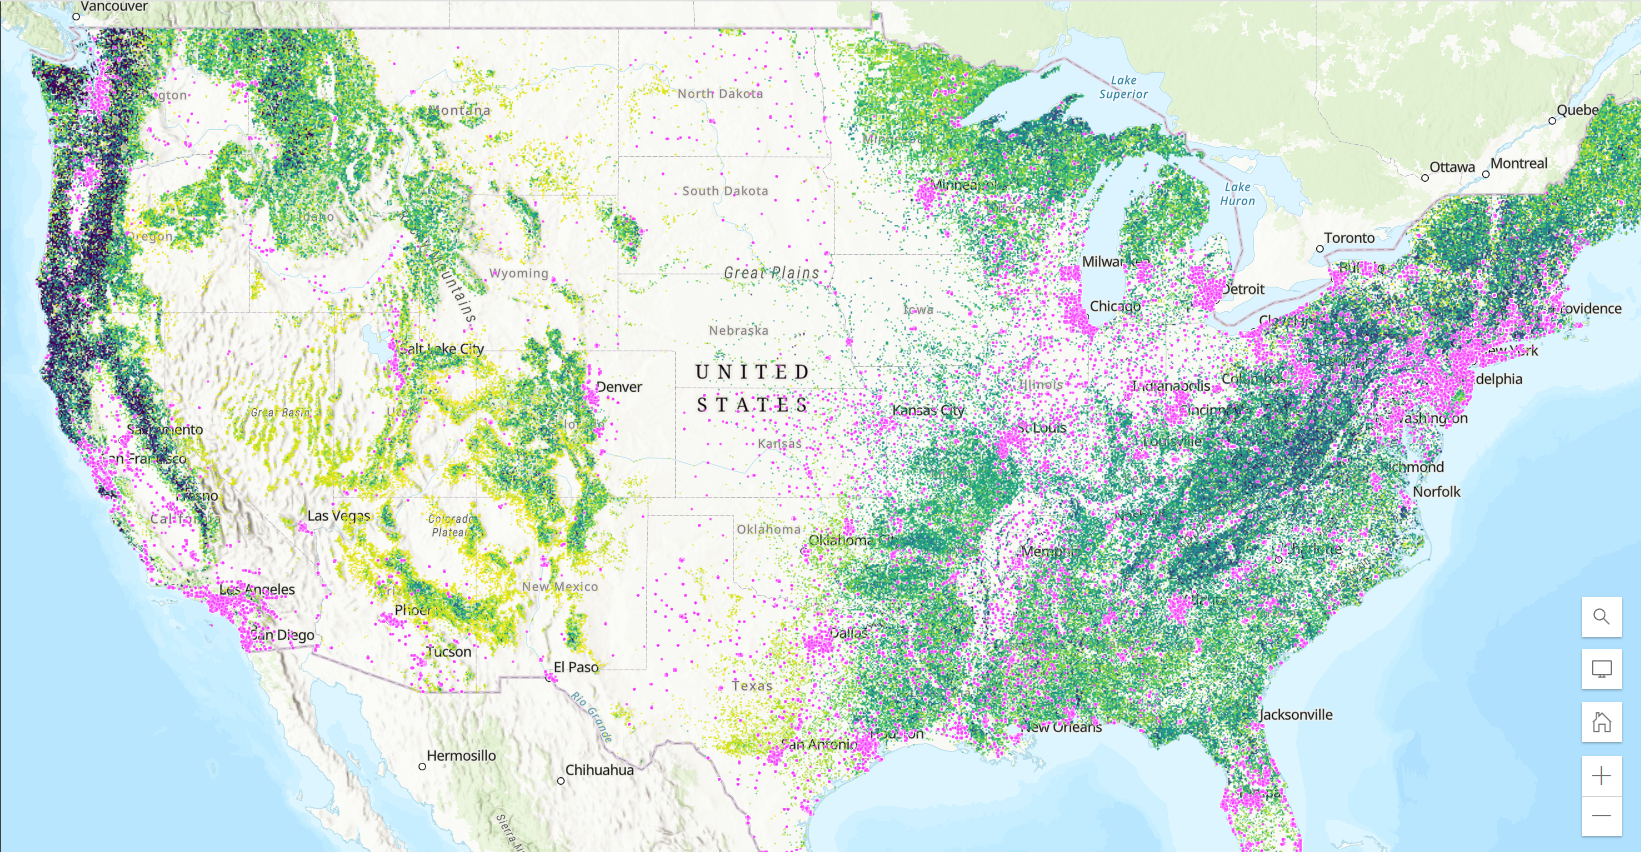

Although this is limited, qualitative analysis - the interesting point here is that community grants seem to be negatively correlated with live biomass, even in very leafy states such as California. However, the connection is likely to be that community grants will most likely be spent on more urban areas with greater populations (which would be in competition with area for biomass). In other words, there is unlikely to be a causation link between community grant projects and live biomass in 2016.

Another step (if we had access to ArcGIS Pro) would be to raster sample these points, take the average colour, and compare it against the average raster values of the states, counties, or other areas. If we found that these points tended to have colours higher on the colour ramp, it would suggest that community grants tended to (locally) be associated with areas of more biomass.

### (More) quantitative analysis using tree inventories

To conduct more quantitative analysis, we are going to use a dataset from the US Forest Research which inventoried live trees in 2013 across 49 cities in California.

<Axes: xlabel='Number of projects', ylabel='Number of trees'>

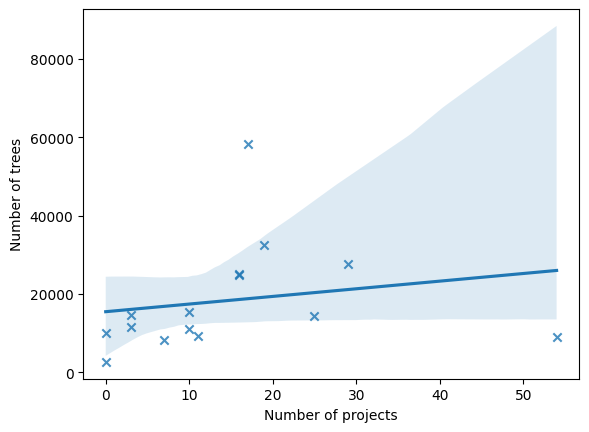

In [60]:
# SOCALCOAST REGION #

cities = ["Bellflower", "Camarillo", "Carlsbad", "Carpinteria", "CostaMesa", "CulverCity",
          "Cypress", "Encinitas", "Irvine", "LagunaHills", "LaMesa", "MontereyPark",
          "Paramount", "SanMarcos", "SantaMonica"]

filter_for_acquisition = cleaned_community_df['GROUPING'] == "Acquisition"
filter_for_improvements = cleaned_community_df['GROUPING'] == "Public Improvements"

trees_and_projects_per_city = {}

for city in cities :
    adjoining_df = pd.read_csv(f"../Data/RDS-2017-0010/Data/SoCalCoast/{city}_Inventory.csv", encoding='unicode_escape')
    number_of_trees = len(adjoining_df)
    if city == "CostaMesa" : 
        filter_for_city = cleaned_community_df['CITY'] == "Costa Mesa"
    elif city == "CulverCity" : 
        filter_for_city = cleaned_community_df['CITY'] == "Culver City"
    elif city == "LagunaHills" : 
        filter_for_city = cleaned_community_df['CITY'] == "Laguna Hills"
    elif city == "LeMesa" : 
        filter_for_city = cleaned_community_df['CITY'] == "Le Mesa"
    elif city == "MontereyPark" : 
        filter_for_city = cleaned_community_df['CITY'] == "Monterey Park"
    elif city == "SanMarcos" : 
        filter_for_city = cleaned_community_df['CITY'] == "San Marcos"
    elif city == "SantaMonica" : 
        filter_for_city = cleaned_community_df['CITY'] == "Santa Monica"
    else : 
        filter_for_city = cleaned_community_df['CITY'] == city
    
    number_of_projects = len(cleaned_community_df[(filter_for_acquisition | filter_for_improvements) & filter_for_city])

    trees_and_projects_per_city[city] = {"Number of trees" : number_of_trees,
                                         "Number of projects" : number_of_projects
                                        }
    
SoCal_cities_df = pd.DataFrame.from_dict(trees_and_projects_per_city).transpose()

seaborn.regplot(data=SoCal_cities_df, y="Number of trees", x="Number of projects", truncate=True, marker="x")

In [36]:
SoCal_cities_df.sum()

Number of trees       275274
Number of projects       130
dtype: int64

<Axes: xlabel='Number of projects', ylabel='Number of trees'>

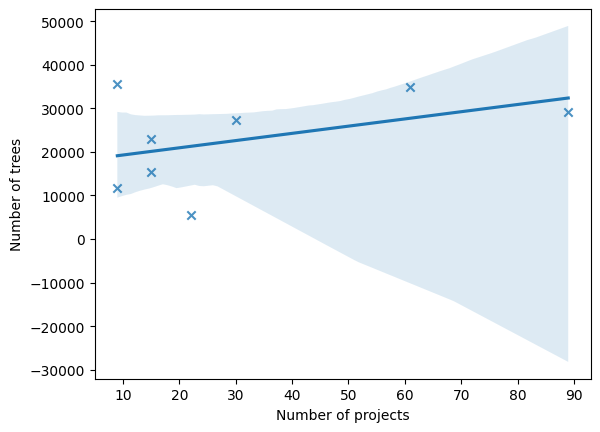

In [59]:
# NORCALCOAST REGION #

cities = ["ArroyoGrande", "Berkeley", "Burlingame", "Hayward", "PaloAlto", "RedwoodCity",
          "SanMateo", "WalnutCreek"]

filter_for_acquisition = cleaned_community_df['GROUPING'] == "Acquisition"
filter_for_improvements = cleaned_community_df['GROUPING'] == "Public Improvements"

trees_and_projects_per_city = {}

for city in cities :
    adjoining_df = pd.read_csv(f"../Data/RDS-2017-0010/Data/NorCalCoast/{city}_Inventory.csv", encoding='unicode_escape')
    number_of_trees = len(adjoining_df)
    if city == "ArroyoGrande" : filter_for_city = cleaned_community_df['CITY'] == "Arroyo Grande"
    elif city == "PaloAlto" : filter_for_city = cleaned_community_df['CITY'] == "Palo Alto"
    elif city == "RedwoodCity" : filter_for_city = cleaned_community_df['CITY'] == "Redwood City"
    elif city == "SanMateo" : filter_for_city = cleaned_community_df['CITY'] == "San Mateo"
    elif city == "WalnutCreek" : filter_for_city = cleaned_community_df['CITY'] == "Walnut Creek"
    else : 
        filter_for_city = cleaned_community_df['CITY'] == city
    
    number_of_projects = len(cleaned_community_df[(filter_for_acquisition | filter_for_improvements) & filter_for_city])

    trees_and_projects_per_city[city] = {"Number of trees" : number_of_trees,
                                         "Number of projects" : number_of_projects
                                        }

NorCal_cities_df = pd.DataFrame.from_dict(trees_and_projects_per_city).transpose()

seaborn.regplot(data=NorCal_cities_df, y="Number of trees", x="Number of projects", truncate=True, marker="x")

<Axes: xlabel='Number of projects', ylabel='Number of trees'>

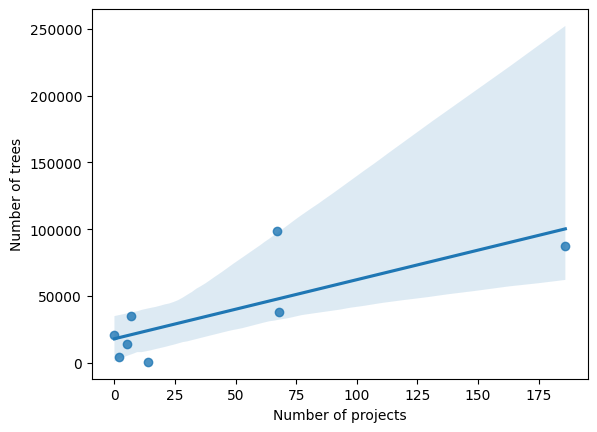

In [65]:
# INLAND VALLEY REGION #

cities = ["Brentwood", "Clovis", "Oakley", "Roseville", "Sacramento", "Stockton",
          "Tulare", "WestSacramento"]

filter_for_acquisition = cleaned_community_df['GROUPING'] == "Acquisition"
filter_for_improvements = cleaned_community_df['GROUPING'] == "Public Improvements"

trees_and_projects_per_city = {}

for city in cities :
    adjoining_df = pd.read_csv(f"../Data/RDS-2017-0010/Data/InlandValley/{city}_Inventory.csv", encoding='unicode_escape')
    number_of_trees = len(adjoining_df)
    if city == "WestSacramento" : 
        filter_for_city = cleaned_community_df['CITY'] == "West Sacramento"
    else : 
        filter_for_city = cleaned_community_df['CITY'] == city
    
    number_of_projects = len(cleaned_community_df[(filter_for_acquisition | filter_for_improvements) & filter_for_city])

    trees_and_projects_per_city[city] = {"Number of trees" : number_of_trees,
                                         "Number of projects" : number_of_projects
                                        }

InLand_Val_cities_df = pd.DataFrame.from_dict(trees_and_projects_per_city).transpose()

seaborn.regplot(data=InLand_Val_cities_df, y="Number of trees", x="Number of projects")

<Axes: xlabel='Number of projects', ylabel='Number of trees'>

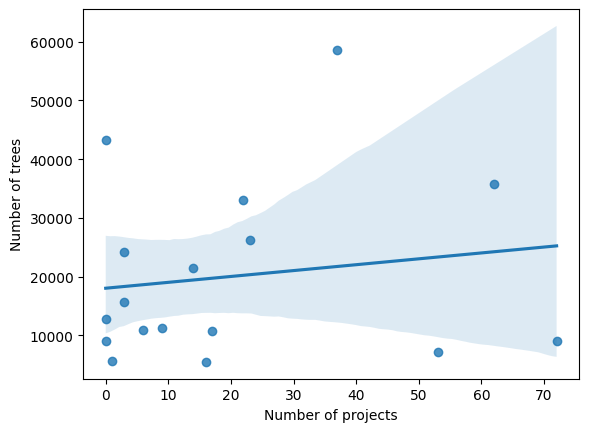

In [64]:
# INLAND EMPIRE REGION #

cities = ["Alhambra", "Azusa", "ChinoHills", "Claremont", "ElCajon", "Glendora",
          "Highland", "LaCanadaFlintridge", "Montclair", "Norco", "Ontario",
         "Pomona", "Poway", "Rialto", "SanDimas", "TempleCity", "Upland"]

filter_for_acquisition = cleaned_community_df['GROUPING'] == "Acquisition"
filter_for_improvements = cleaned_community_df['GROUPING'] == "Public Improvements"

trees_and_projects_per_city = {}

for city in cities :
    adjoining_df = pd.read_csv(f"../Data/RDS-2017-0010/Data/InlandEmpire/{city}_Inventory.csv", encoding='unicode_escape')
    number_of_trees = len(adjoining_df)
    if city == "ChinoHills" : 
        filter_for_city = cleaned_community_df['CITY'] == "Chino Hills"
    elif city == "ElCajon" : 
        filter_for_city = cleaned_community_df['CITY'] == "El Cajon"
    elif city == "LaCanadaFlintridge" : 
        filter_for_city = cleaned_community_df['CITY'] == "La Canada Flintridge"
    elif city == "SanDimas" : 
        filter_for_city = cleaned_community_df['CITY'] == "San Dimas"
    elif city == "TempleCity" : 
        filter_for_city = cleaned_community_df['CITY'] == "Temple City"
    else : 
        filter_for_city = cleaned_community_df['CITY'] == city
    
    number_of_projects = len(cleaned_community_df[(filter_for_acquisition | filter_for_improvements) & filter_for_city])

    trees_and_projects_per_city[city] = {"Number of trees" : number_of_trees,
                                         "Number of projects" : number_of_projects
                                        }

InLand_Empire_cities_df = pd.DataFrame.from_dict(trees_and_projects_per_city).transpose()

seaborn.regplot(data=InLand_Empire_cities_df, y="Number of trees", x="Number of projects")

In [66]:
SoCal_cities_df['Region'] = "SoCalCoast"
InLand_Empire_cities_df['Region'] = "InlandEmpire"
InLand_Val_cities_df['Region'] = "InlandValley"
NorCal_cities_df['Region'] = "NorCalCoast"

In [71]:
combined_regions_df = pd.concat([SoCal_cities_df, InLand_Val_cities_df, InLand_Empire_cities_df, NorCal_cities_df], join="outer")

In [75]:
combined_regions_df

,Number of trees,Number of projects,Region
Bellflower,9393,11,SoCalCoast
Camarillo,24962,16,SoCalCoast
Carlsbad,14311,25,SoCalCoast
Carpinteria,2688,0,SoCalCoast
CostaMesa,25091,16,SoCalCoast
CulverCity,15491,10,SoCalCoast
Cypress,14756,3,SoCalCoast
Encinitas,11049,10,SoCalCoast
Irvine,58364,17,SoCalCoast
LagunaHills,11690,3,SoCalCoast


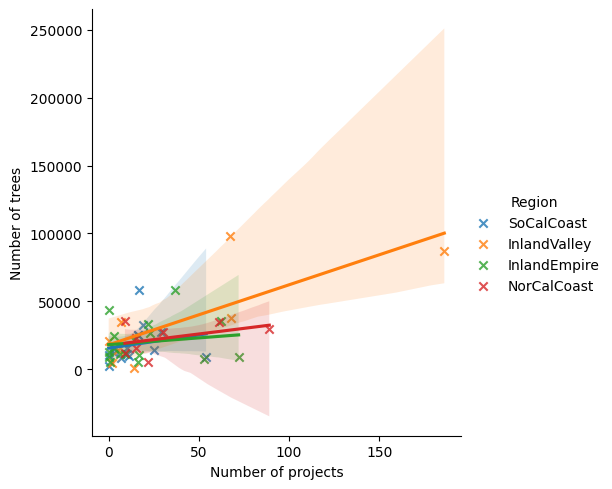

In [79]:
seaborn.lmplot(data=combined_regions_df, y="Number of trees", x="Number of projects", hue="Region", markers="x")

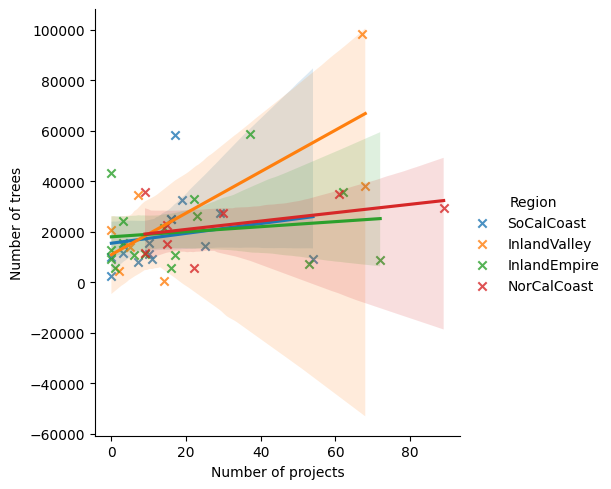

In [83]:
remove_sacramento = combined_regions_df['Number of projects'] == 186
remove_brentwood = combined_regions_df['Number of trees'] == 601

seaborn.lmplot(data=combined_regions_df[~remove_sacramento], y="Number of trees", x="Number of projects", hue="Region", markers="x")

In [84]:
x = 0

for x in range(0, 1001) :
    print(f"Brand {x}")

Brand 0
Brand 1
Brand 2
Brand 3
Brand 4
Brand 5
Brand 6
Brand 7
Brand 8
Brand 9
Brand 10
Brand 11
Brand 12
Brand 13
Brand 14
Brand 15
Brand 16
Brand 17
Brand 18
Brand 19
Brand 20
Brand 21
Brand 22
Brand 23
Brand 24
Brand 25
Brand 26
Brand 27
Brand 28
Brand 29
Brand 30
Brand 31
Brand 32
Brand 33
Brand 34
Brand 35
Brand 36
Brand 37
Brand 38
Brand 39
Brand 40
Brand 41
Brand 42
Brand 43
Brand 44
Brand 45
Brand 46
Brand 47
Brand 48
Brand 49
Brand 50
Brand 51
Brand 52
Brand 53
Brand 54
Brand 55
Brand 56
Brand 57
Brand 58
Brand 59
Brand 60
Brand 61
Brand 62
Brand 63
Brand 64
Brand 65
Brand 66
Brand 67
Brand 68
Brand 69
Brand 70
Brand 71
Brand 72
Brand 73
Brand 74
Brand 75
Brand 76
Brand 77
Brand 78
Brand 79
Brand 80
Brand 81
Brand 82
Brand 83
Brand 84
Brand 85
Brand 86
Brand 87
Brand 88
Brand 89
Brand 90
Brand 91
Brand 92
Brand 93
Brand 94
Brand 95
Brand 96
Brand 97
Brand 98
Brand 99
Brand 100
Brand 101
Brand 102
Brand 103
Brand 104
Brand 105
Brand 106
Brand 107
Brand 108
Brand 109
Brand 110


In [86]:
for x in range(0, 201) :
    print(f"Brand group {x}")

Brand group 0
Brand group 1
Brand group 2
Brand group 3
Brand group 4
Brand group 5
Brand group 6
Brand group 7
Brand group 8
Brand group 9
Brand group 10
Brand group 11
Brand group 12
Brand group 13
Brand group 14
Brand group 15
Brand group 16
Brand group 17
Brand group 18
Brand group 19
Brand group 20
Brand group 21
Brand group 22
Brand group 23
Brand group 24
Brand group 25
Brand group 26
Brand group 27
Brand group 28
Brand group 29
Brand group 30
Brand group 31
Brand group 32
Brand group 33
Brand group 34
Brand group 35
Brand group 36
Brand group 37
Brand group 38
Brand group 39
Brand group 40
Brand group 41
Brand group 42
Brand group 43
Brand group 44
Brand group 45
Brand group 46
Brand group 47
Brand group 48
Brand group 49
Brand group 50
Brand group 51
Brand group 52
Brand group 53
Brand group 54
Brand group 55
Brand group 56
Brand group 57
Brand group 58
Brand group 59
Brand group 60
Brand group 61
Brand group 62
Brand group 63
Brand group 64
Brand group 65
Brand group 66
Brand

In [88]:
  # <row label="r1" cond="condition.marker__Brand_group_0">Brand 1</row>
  # <row label="r2" cond="condition.marker__Brand_group_0">Brand 2</row>
  # <row label="r3" cond="condition.marker__Brand_group_0">Brand 3</row>
  # <row label="r4" cond="condition.marker__Brand_group_0">Brand 4</row>
  # <row label="r5" cond="condition.marker__Brand_group_0">Brand 5</row>
  # <row label="r6">Brand 6</row>
  # <row label="r7">Brand 7</row>
  # <row label="r8">Brand 8</row>
  # <row label="r9">Brand 9</row>
  # <row label="r10">Brand 10</row>
  # <row label="r11">Brand 11</row>
  # <row label="r12">Brand 12</row>
  # <row label="r13">Brand 13</row>
  # <row label="r14">Brand 14</row>
  # <row label="r15">Brand 15</row>
  # <row label="r16">Brand 16</row>

group = 0

for x in range(1, 1001) :
    print(f'<row label="r{x}" cond="condition.marker__Brand_group_{group}">Brand {x}</row>')
    if (x > 0) and (x % 10 == 0) :
        group += 1


<row label="r1" cond="condition.marker__Brand_group_0">Brand 1</row>
<row label="r2" cond="condition.marker__Brand_group_0">Brand 2</row>
<row label="r3" cond="condition.marker__Brand_group_0">Brand 3</row>
<row label="r4" cond="condition.marker__Brand_group_0">Brand 4</row>
<row label="r5" cond="condition.marker__Brand_group_0">Brand 5</row>
<row label="r6" cond="condition.marker__Brand_group_0">Brand 6</row>
<row label="r7" cond="condition.marker__Brand_group_0">Brand 7</row>
<row label="r8" cond="condition.marker__Brand_group_0">Brand 8</row>
<row label="r9" cond="condition.marker__Brand_group_0">Brand 9</row>
<row label="r10" cond="condition.marker__Brand_group_0">Brand 10</row>
<row label="r11" cond="condition.marker__Brand_group_1">Brand 11</row>
<row label="r12" cond="condition.marker__Brand_group_1">Brand 12</row>
<row label="r13" cond="condition.marker__Brand_group_1">Brand 13</row>
<row label="r14" cond="condition.marker__Brand_group_1">Brand 14</row>
<row label="r15" cond="c